# Baseline Model based on U-Net

In [1]:
import os

# needed to get the path right
os.chdir("..")

## Training

In [2]:
from baseline.trainer import Trainer

trainer = Trainer()

Segmentation Models: using `tf.keras` framework.


In [14]:
model = trainer.get_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [15]:
%time history = trainer.train_from_simple_dataloader(dataset_size=10, batch_size=1, epochs=50)

Epoch 1/50
9/9 - 35s - loss: 1.4627 - iou_score: 0.1906 - f1-score: 0.3109 - f2-score: 0.3777 - recall: 0.4843 - precision: 0.2564 - val_loss: 1.6034 - val_iou_score: 0.0156 - val_f1-score: 0.0308 - val_f2-score: 0.0698 - val_recall: 0.4496 - val_precision: 0.0159
Epoch 2/50
9/9 - 26s - loss: 1.3135 - iou_score: 0.2404 - f1-score: 0.3768 - f2-score: 0.4618 - recall: 0.6003 - precision: 0.3088 - val_loss: 1.7110 - val_iou_score: 0.0175 - val_f1-score: 0.0344 - val_f2-score: 0.0787 - val_recall: 0.5647 - val_precision: 0.0177
Epoch 3/50
9/9 - 26s - loss: 1.2304 - iou_score: 0.2699 - f1-score: 0.4135 - f2-score: 0.5074 - recall: 0.6604 - precision: 0.3388 - val_loss: 1.8287 - val_iou_score: 0.0178 - val_f1-score: 0.0349 - val_f2-score: 0.0805 - val_recall: 0.6299 - val_precision: 0.0179
Epoch 4/50
9/9 - 26s - loss: 1.1680 - iou_score: 0.2933 - f1-score: 0.4415 - f2-score: 0.5419 - recall: 0.7039 - precision: 0.3616 - val_loss: 1.9179 - val_iou_score: 0.0188 - val_f1-score: 0.0369 - val_f2

In [16]:
history.history['iou_score']

[0.19056250154972076,
 0.24044588208198547,
 0.269947350025177,
 0.29328349232673645,
 0.31372493505477905,
 0.32946351170539856,
 0.3436996340751648,
 0.3560621738433838,
 0.36529362201690674,
 0.3782443702220917,
 0.38093939423561096,
 0.3940110504627228,
 0.39614003896713257,
 0.3989318311214447,
 0.40078163146972656,
 0.40255773067474365,
 0.4038673937320709,
 0.40528061985969543,
 0.40652143955230713,
 0.40771228075027466,
 0.4088400602340698,
 0.4099406898021698,
 0.41105562448501587,
 0.41210949420928955,
 0.4131737947463989,
 0.4142470359802246,
 0.4151720404624939,
 0.4162665605545044,
 0.41725683212280273,
 0.4182182848453522,
 0.4191495180130005,
 0.4201701879501343,
 0.4211651384830475,
 0.4220028519630432,
 0.4230017066001892,
 0.4238991439342499,
 0.42483001947402954,
 0.425758957862854,
 0.4266264736652374,
 0.42747899889945984,
 0.4283856153488159,
 0.42924201488494873,
 0.4301541745662689,
 0.4309491515159607,
 0.4318484961986542,
 0.4326472580432892,
 0.43354013562202

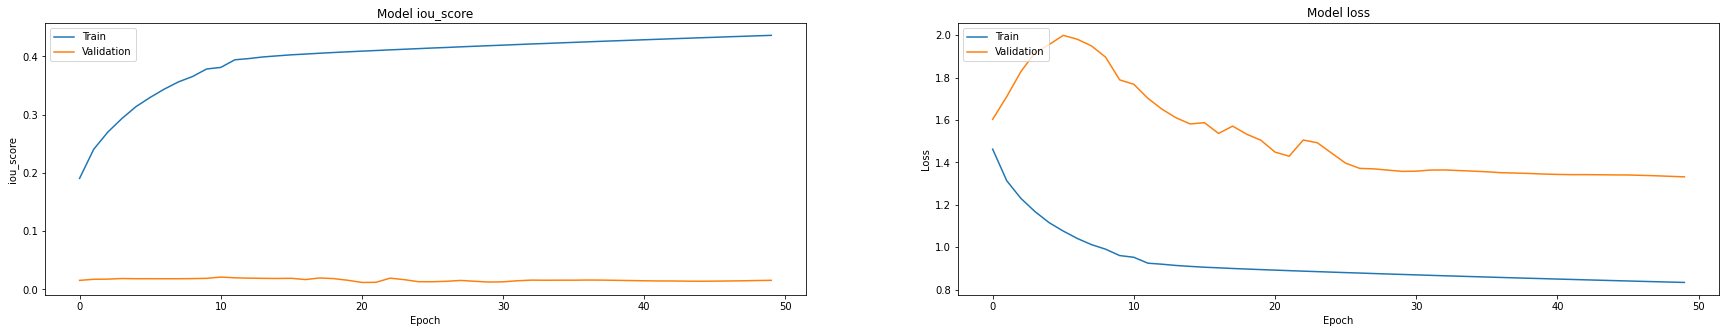

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Prediction

In [18]:
import segmentation_models as sm
from constants import TEST_DIR
from utils.dataloader import SimpleDataLoader
from utils.helper import Visualisation

simple_data_loader = SimpleDataLoader(
    backbone=Trainer.BACKBONE,
    images_path=os.path.join(TEST_DIR, "images"),
    size=10
)

test_images = simple_data_loader.get_images()

(512, 512, 3)
(1, 512, 512, 3)


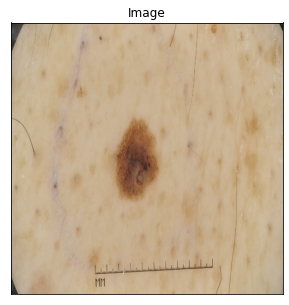

In [19]:
import numpy as np

test_image = test_images[1]

print(test_image.shape)
test_image = np.expand_dims(test_image, axis=0)  # add batch dimension
print(test_image.shape)

Visualisation().show(image=test_image.squeeze())

In [20]:
predicted_mask = model.predict(test_image).round()
print(predicted_mask.shape)

(1, 512, 512, 1)


In [21]:
predicted_mask[..., 0].shape

(1, 512, 512)

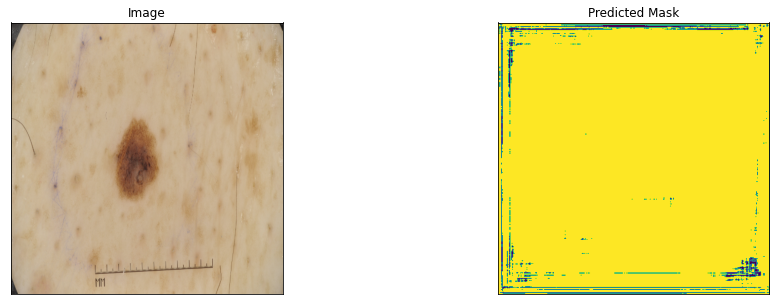

In [22]:
Visualisation().show(
    image=test_image.squeeze(),
    predicted_mask=predicted_mask[..., 0].squeeze()
)

(1, 512, 512, 3)
(1, 512, 512, 1)


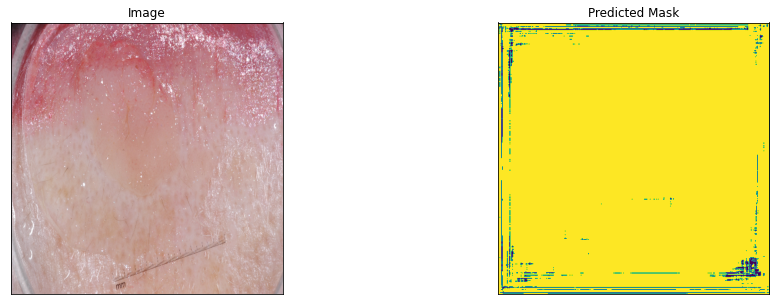

(1, 512, 512, 3)
(1, 512, 512, 1)


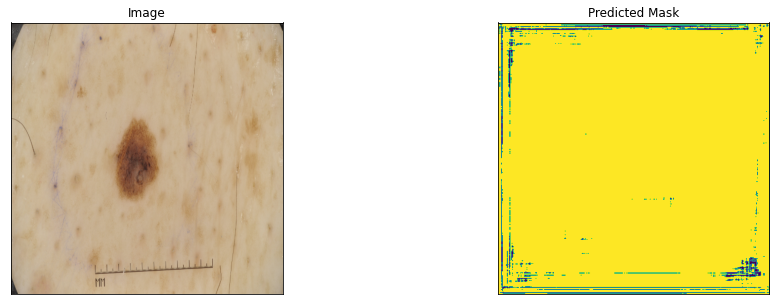

(1, 512, 512, 3)
(1, 512, 512, 1)


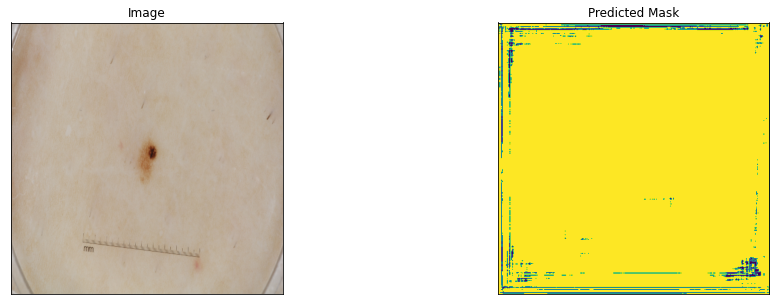

In [23]:
for test_image in simple_data_loader.get_images()[:3]:
    test_image = np.expand_dims(test_image, axis=0)
    print(test_image.shape)
    predicted_mask = model.predict(test_image).round()
    print(predicted_mask.shape)
    
    Visualisation().show(
        image=test_image.squeeze(),
        predicted_mask=predicted_mask[..., 0].squeeze()
    )

## Data Augmentation

In [4]:
train_data = trainer.get_training_data(dataset_size=10)["images"]

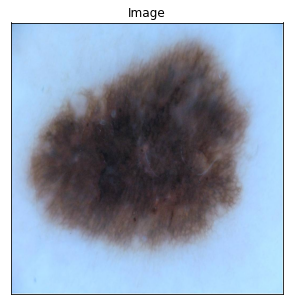

In [5]:
Visualisation().show(image=train_data[0].squeeze())

In [6]:
from utils.augmentation import DataAugmentation

data_augmentation = DataAugmentation()
augmented_image = data_augmentation.apply_advanced(train_data[0])

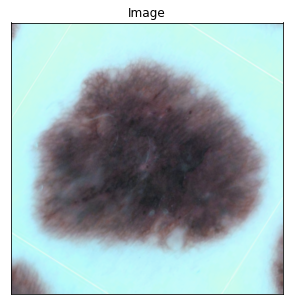

In [7]:
Visualisation().show(image=augmented_image.squeeze())

In [12]:
from utils.augmentation import AdvancedHairAugmentation

augmented_image = AdvancedHairAugmentation().apply(train_data[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


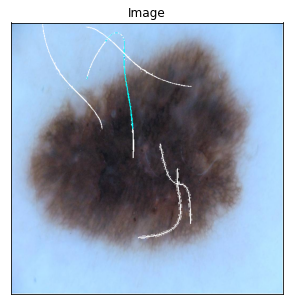

In [13]:
Visualisation().show(image=augmented_image.squeeze())